### Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# Convert all 'object' datatype columns to 'numeric'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_num = df.copy()

cat_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for c in cat_features:
    df_num[c] = le.fit_transform(df[c])
    df_num[c] = df_num[c].astype('category')

In [5]:
# original dataset
print(df['ST_Slope'].value_counts())

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


In [6]:
# dataset after type conversion
print(df_num['ST_Slope'].value_counts())

1    460
2    395
0     63
Name: ST_Slope, dtype: int64


In [7]:
# Get X, y sets
X = df_num.drop('HeartDisease', axis=1)
y = df_num['HeartDisease']

#### Decompose data to get a better look on how classes are separated

In [8]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=3)
reduced_X = pca_model.fit_transform(df_num)

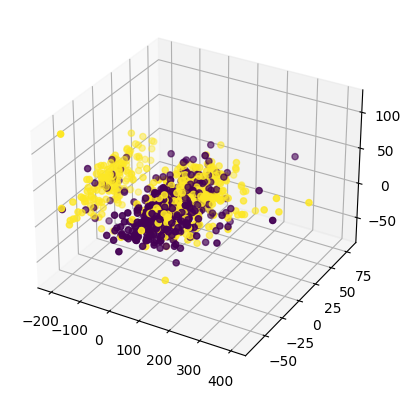

In [9]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.axes(projection='3d')
ax.scatter3D(reduced_X[:,0], reduced_X[:,1], reduced_X[:,2], c=y);

### Train & Evaluate Classification Algorithms

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split

In [11]:
def show_results(results: dict):
    print("Classification Report:")
    print(results['classification_report'])

    print("Confusion Matrix:")
    ConfusionMatrixDisplay(results['confusion_matrix']).plot()

In [12]:

def train_evaluate(model, grid_params=None, cv=5, X=X, y=y):
    # split data into tarin & test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

    # check for applying grid search
    if (grid_params is None):
        model.fit(X_train, y_train)
    else:
        model_gs = GridSearchCV(model, grid_params, scoring='balanced_accuracy', cv=cv, return_train_score=True)
        model_gs.fit(X_train, y_train)
        model = model_gs.best_estimator_

    # predict test results
    y_pred = model.predict(X_test)

    # show results
    results = {}
    results["classification_report"] = classification_report(y_test, y_pred)
    results["confusion_matrix"] = confusion_matrix(y_test, y_pred)
    show_results(results)

    return model

# Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.83      0.86      0.84        50

    accuracy                           0.83        92
   macro avg       0.83      0.82      0.82        92
weighted avg       0.83      0.83      0.83        92

Confusion Matrix:


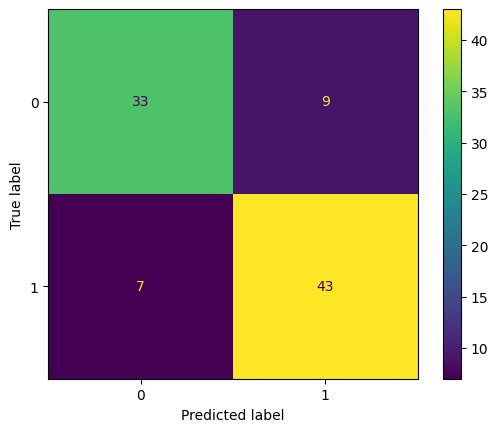

In [13]:
from sklearn.ensemble import RandomForestClassifier

rfc_params = [{"n_estimators": [30, 100, 300], "max_features": [6, 8, 10]}]
rfc = train_evaluate(RandomForestClassifier(), rfc_params)

# AdaBoost

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        42
           1       0.85      0.82      0.84        50

    accuracy                           0.83        92
   macro avg       0.82      0.83      0.83        92
weighted avg       0.83      0.83      0.83        92

Confusion Matrix:


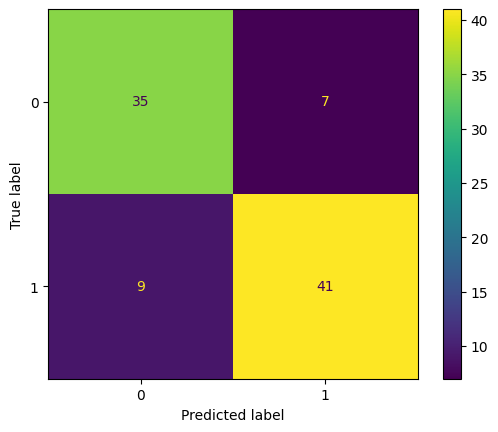

In [14]:
from sklearn.ensemble import AdaBoostClassifier

grid_params = [{"n_estimators": [30, 60, 100]}]
adc = train_evaluate(AdaBoostClassifier(random_state=10), grid_params)

# GradientBoost

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        42
           1       0.83      0.88      0.85        50

    accuracy                           0.84        92
   macro avg       0.84      0.83      0.83        92
weighted avg       0.84      0.84      0.84        92

Confusion Matrix:


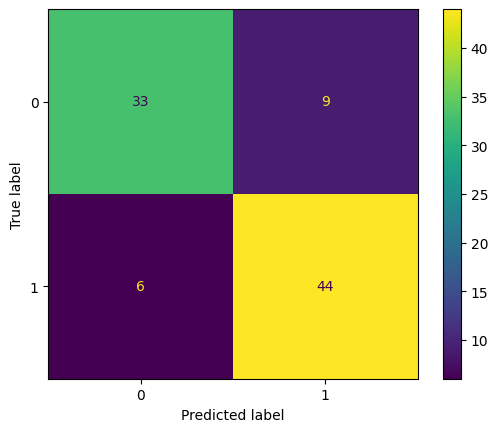

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

grid_params = [{"n_estimators": [30, 60, 100]}]
gbc = train_evaluate(GradientBoostingClassifier(random_state=10), grid_params)

# Logistic Regression

In [16]:
# Scale Data for Gradient Descent Based Algorithms
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

X_std = std_scaler.fit_transform(X)
X_rob = rob_scaler.fit_transform(X)

In [17]:
from sklearn.linear_model import LogisticRegression

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        42
           1       0.83      0.76      0.79        50

    accuracy                           0.78        92
   macro avg       0.78      0.78      0.78        92
weighted avg       0.79      0.78      0.78        92

Confusion Matrix:


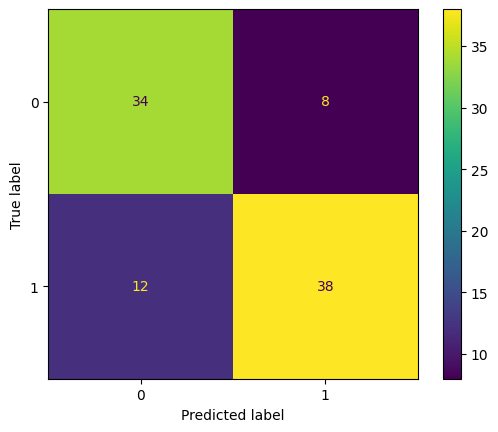

In [18]:
# Standard Scaled data
lr_std = train_evaluate(LogisticRegression(random_state=10), X=X_std)

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        42
           1       0.83      0.78      0.80        50

    accuracy                           0.79        92
   macro avg       0.79      0.79      0.79        92
weighted avg       0.80      0.79      0.79        92

Confusion Matrix:


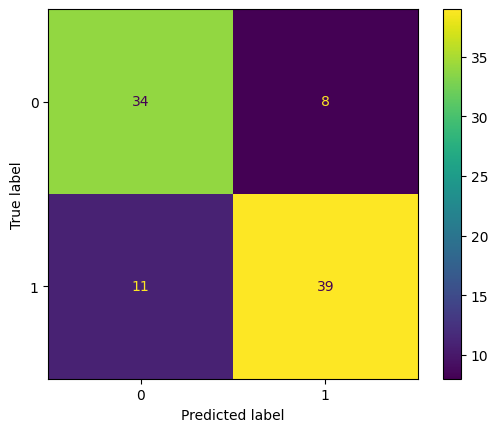

In [19]:
# Robust Scaled data
lr_std = train_evaluate(LogisticRegression(random_state=10), X=X_rob)

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        42
           1       0.83      0.78      0.80        50

    accuracy                           0.79        92
   macro avg       0.79      0.79      0.79        92
weighted avg       0.80      0.79      0.79        92

Confusion Matrix:


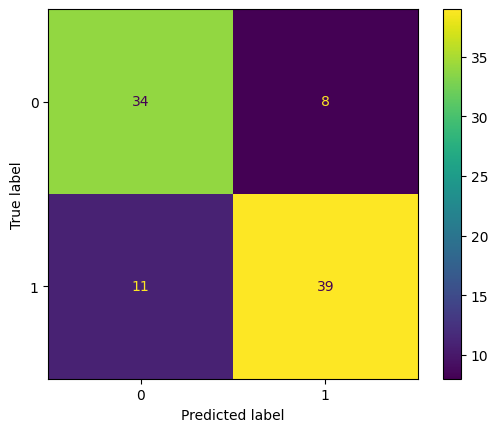

In [20]:
# Robust Scaled data with l2 penalty
lr_l2 = train_evaluate(LogisticRegression(penalty='l2', random_state=10), X=X_rob)